In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [66]:
df = pd.read_csv('TehranHouse.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [67]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [69]:
df.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

Fill the null with mode

In [70]:
df["Address"]=df["Address"].fillna(df["Address"].mode()[0])

In [71]:
df.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

# See duplicates and drop it

In [72]:
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

208


# Make the Area column clean to change its data type 

In [73]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
non_numeric_areas = df[pd.to_numeric(df['Area'], errors='coerce').isna()]
print(non_numeric_areas['Area'].unique())
 

[nan]


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3271 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3265 non-null   float64
 1   Room        3271 non-null   int64  
 2   Parking     3271 non-null   bool   
 3   Warehouse   3271 non-null   bool   
 4   Elevator    3271 non-null   bool   
 5   Address     3271 non-null   object 
 6   Price       3271 non-null   float64
 7   Price(USD)  3271 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 162.9+ KB


# Boxplots to see the outlieries

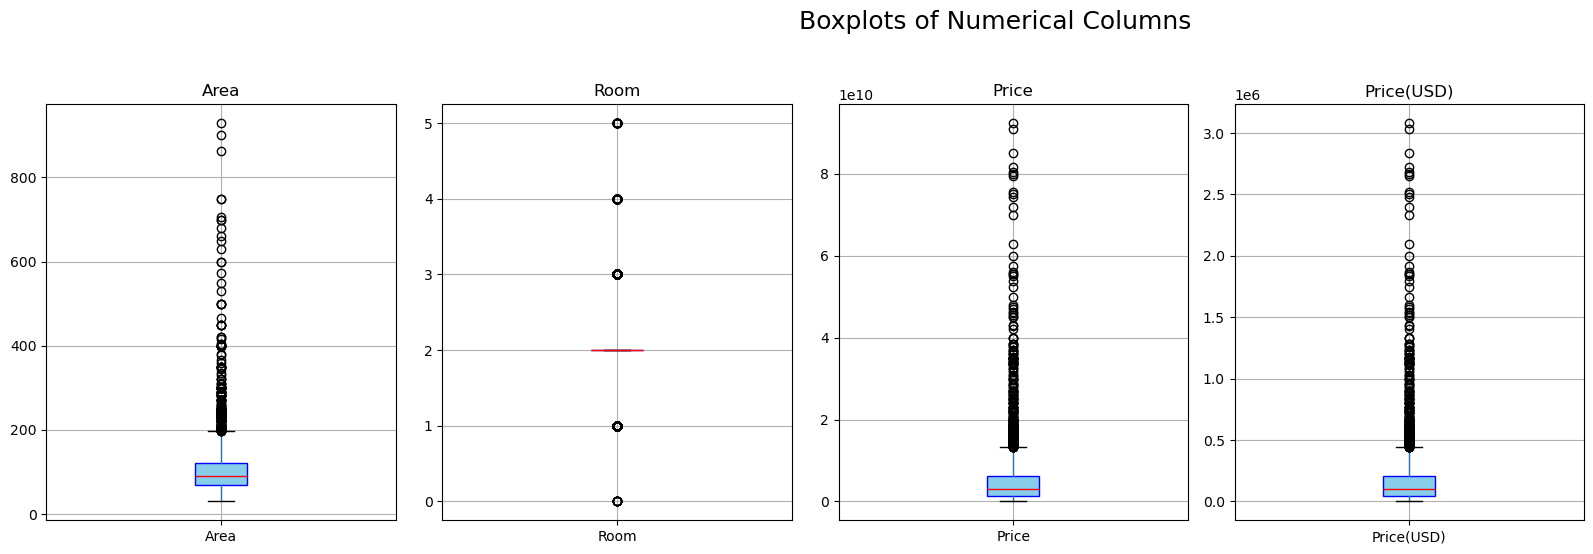

In [75]:
numerical_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    df.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
               medianprops=dict(color='red'))
    plt.title(col, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

# Handling outlieries and Standardization 

In [76]:
df['Area'] = winsorize(df['Area'], limits=[0.05, 0.05])

df['Price(USD)'] = winsorize(df['Price(USD)'], limits=[0.05, 0.05]) 

In [77]:
scaler = StandardScaler()


df['Area'] = scaler.fit_transform(df[['Area']])

df['Price(USD)'] = scaler.fit_transform(df[['Price(USD)']])




# Box plot to see the handeled data

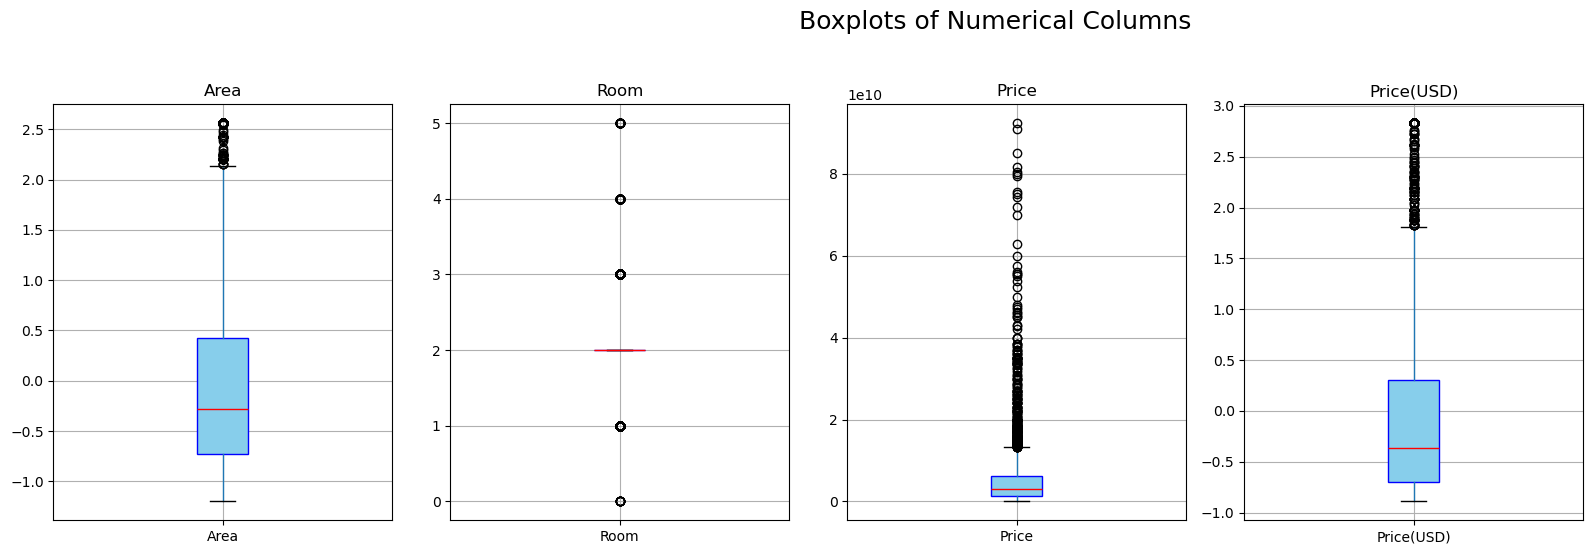

In [78]:
numerical_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 10))
plt.suptitle('Boxplots of Numerical Columns', fontsize=18)

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 5, i)
    df.boxplot(column=col, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'),
               medianprops=dict(color='red'))
    plt.title(col, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

# Label encoder to change the object data type to int

In [79]:

label_encoder = LabelEncoder()

df['Parking'] = label_encoder.fit_transform(df['Parking'])
df['Elevator'] = label_encoder.fit_transform(df['Elevator'])
df['Warehouse'] = label_encoder.fit_transform(df['Warehouse'])


df['Address'] = label_encoder.fit_transform(df['Address'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3271 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3271 non-null   float64
 1   Room        3271 non-null   int64  
 2   Parking     3271 non-null   int64  
 3   Warehouse   3271 non-null   int64  
 4   Elevator    3271 non-null   int64  
 5   Address     3271 non-null   int32  
 6   Price       3271 non-null   float64
 7   Price(USD)  3271 non-null   float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 217.2 KB


# Correlation to see the relation between columns and the target 

<Figure size 1000x600 with 0 Axes>

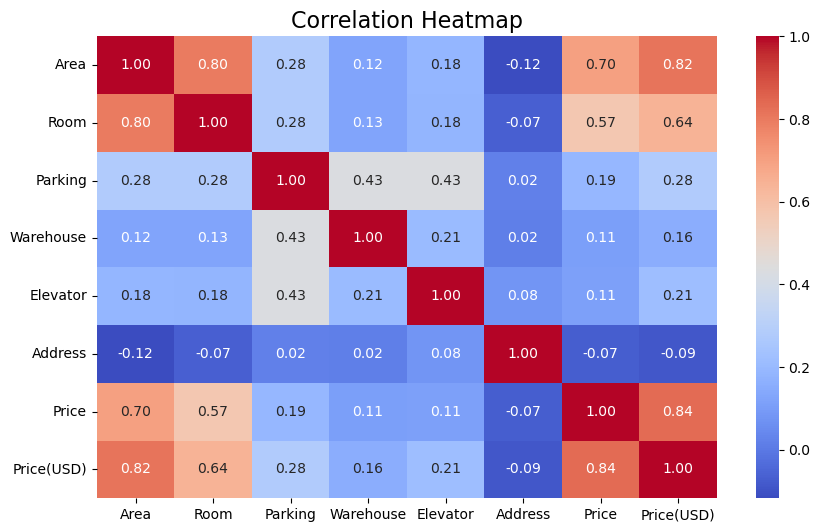

In [81]:
plt.figure(figsize=(10, 6))
numerical_columns = df.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Splitting data to train and test

In [82]:
X = df.drop(['Price(USD)','Price'],axis=1)
y = df['Price(USD)']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25,random_state=42)

# Linear Regression Model

In [84]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  
mme = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  

print("Mean Squared Error:", mse)
print("Mean Magnitude of Error (MME):", mme)
print("R² Score:", r2)

Mean Squared Error: 0.30956110442330886
Mean Magnitude of Error (MME): 0.3872096536289898
R² Score: 0.6806740153378146


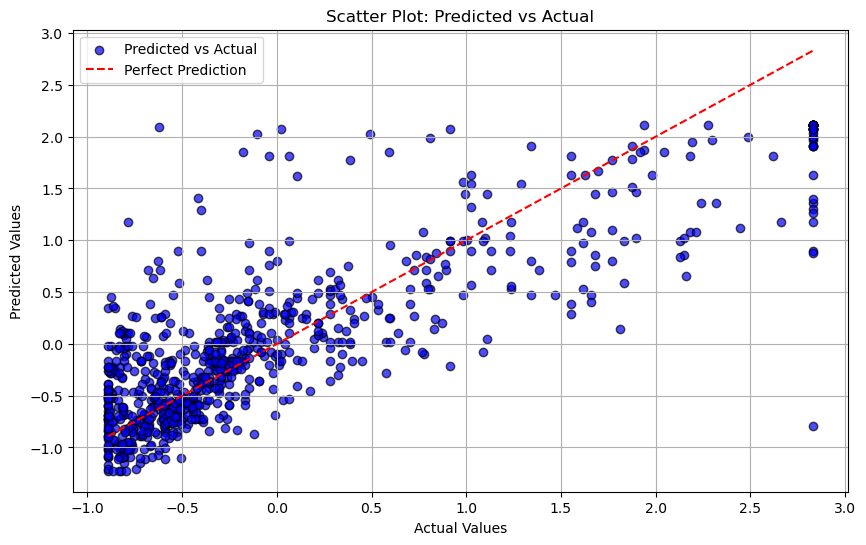

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual', marker='o', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs Actual')

plt.legend()
plt.grid(True)
plt.show()


# Knn elbow to detect lowest error 

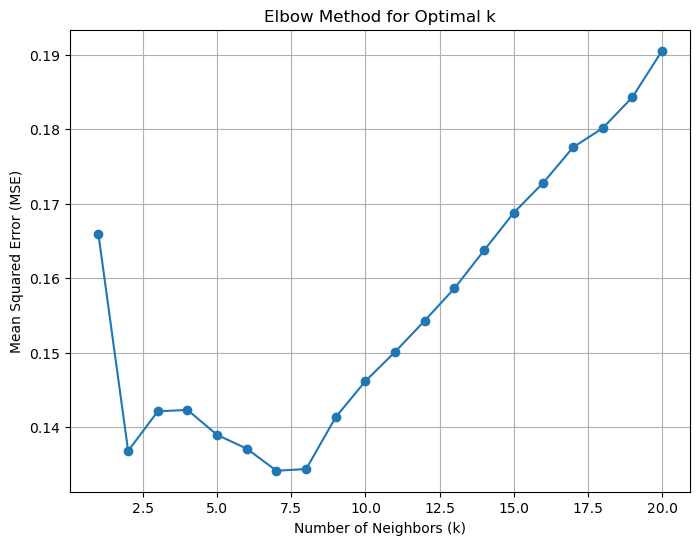

In [86]:
k_range = range(1, 21)
mse_values = []


for k in k_range:
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(8,6))
plt.plot(k_range, mse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# Knn Model

In [87]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  
mme = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  

print("Mean Squared Error:", mse)
print("Mean Magnitude of Error (MME):", mme)
print("R² Score:", r2)

Mean Squared Error: 0.13414783790746973
Mean Magnitude of Error (MME): 0.20792074427976054
R² Score: 0.8616205659625482


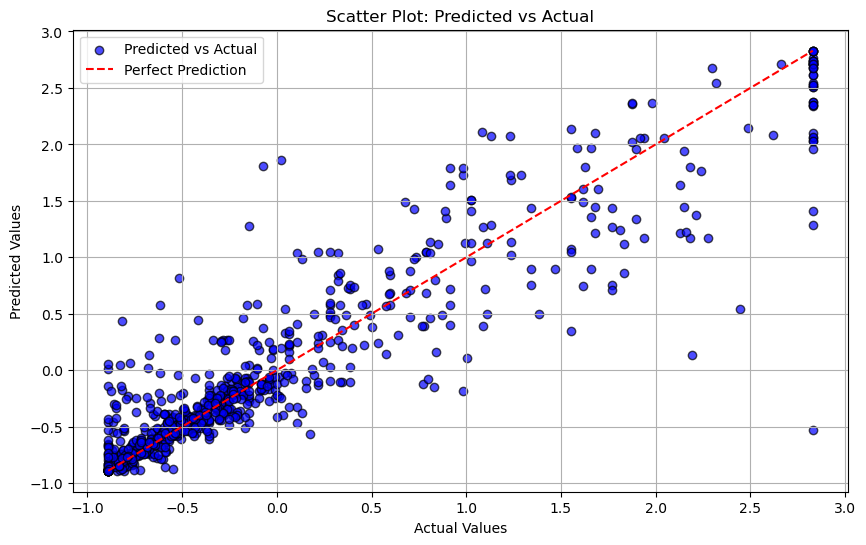

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual', marker='o', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs Actual')

plt.legend()
plt.grid(True)
plt.show()


# Random Forest Model

In [89]:
rf = RandomForestRegressor(n_estimators=50, random_state=42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred) 

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.1792521198007583
R² Score: 0.8150935022512111


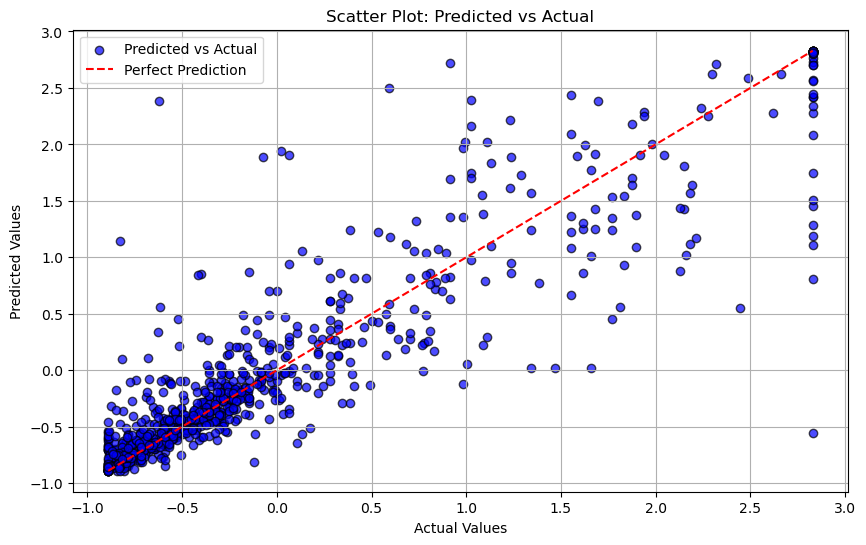

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual', marker='o', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs Actual')

plt.legend()
plt.grid(True)
plt.show()
